https://github.com/Physical-Hacks/workshops/tree/master/plotly

# Interactive visualization
http://htmlpreview.github.io/?https://github.com/hsnee/CMU-DSC-Talks/blob/master/Data_Visualization/InteractiveVisualization.html
https://github.com/hsnee/CMU-DSC-Talks/tree/master/Data_Visualization 

Good for presentation, making websites, or understanding data better

# Plotly
https://plot.ly
- online graphing, data analytics, visualization tools, and statistics tools
- scientific graphing libraries for Python, R, JavaScript, MATLAB, Perl, Julia, Arduino...

# Plotly.py
https://plot.ly/python/
- graphing libraries for Python

# Installation
- pip install --upgrade plotly
- conda install plotly

In [1]:
import plotly

plotly.__version__

'3.5.0'

# Jupyter notebook 

Check here https://jupyter.org/install.html to install the notebook

# Example: scatter plot

Generate mock data: 
- x: 1d array with 100 elements
- y: 1d array with 100 elements

In [2]:
import numpy as np

N = 100
x = np.random.rand(N)
y = np.random.rand(N)

In [3]:
print(x)

[3.64877111e-01 6.41499842e-01 7.86347501e-01 4.27513489e-01
 2.94472751e-01 9.60669200e-01 8.21558830e-01 3.47531499e-01
 2.92153923e-01 5.97428335e-01 9.42888592e-01 9.40637379e-01
 2.82542637e-01 2.82451173e-01 4.51502431e-01 9.43813399e-01
 1.36333915e-01 6.42465874e-01 3.79188013e-01 2.92968193e-01
 4.45517509e-01 4.61428336e-02 6.77637137e-01 1.59422909e-01
 4.51948808e-01 6.19418185e-01 5.03898393e-01 2.47113700e-01
 7.55830995e-01 2.40573150e-01 9.21241318e-01 3.97795925e-02
 8.74141649e-01 1.65822455e-01 3.04034000e-01 5.68057029e-02
 5.22966698e-02 8.71468577e-01 4.85229762e-01 4.10346308e-01
 1.68551178e-01 9.26215043e-01 6.54969043e-01 6.66242385e-01
 6.04738998e-01 2.31685734e-01 9.87987988e-01 7.69654950e-01
 1.31592836e-01 1.58598239e-01 8.59991842e-02 5.26954440e-01
 2.54345223e-01 5.61640337e-02 4.84314678e-01 5.66024548e-01
 2.18836889e-01 5.82668803e-01 1.21707493e-01 2.50871016e-01
 5.12285661e-01 6.56315108e-01 3.31716618e-01 6.26253820e-01
 7.85896930e-01 4.109492

# Using matplotlib: 
The basic python plot

In [4]:
import matplotlib.pyplot as plt

plt.plot(x, y, 'o')
plt.show()

<Figure size 640x480 with 1 Axes>

# Using plotly: 'Offline' mode
There are 'online' and 'offline' modes when using plotly:
- online mode: one has to create an account and then is able to do a lot of things in the web. 
- offline mode: one can make plots locally. 

In [5]:
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go

Set offline mode

In [6]:
init_notebook_mode(connected=True)

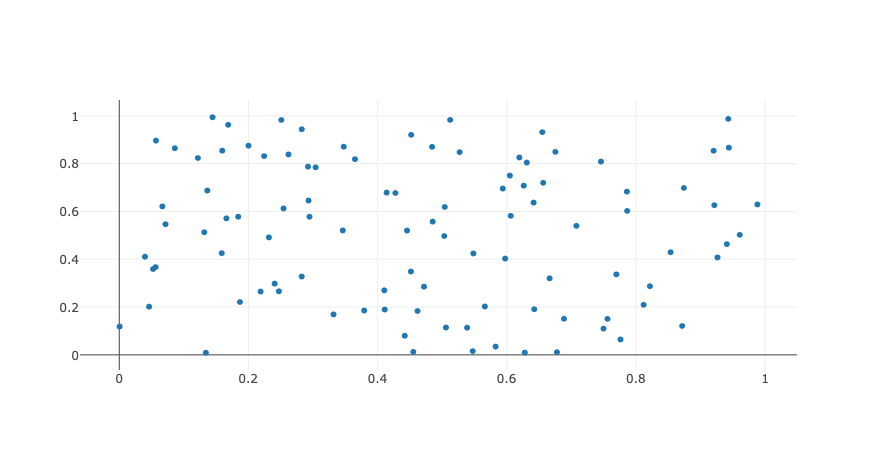

In [7]:
fig = go.Figure()

fig.add_scatter(x=x,
                y=y,
                mode='markers')    # markers, lines or both

iplot(fig)

# More information of the data
Mock other quantities for each data point:

In [8]:
colors = np.random.rand(N)
sz = np.random.rand(N) * 30

ids = list(range(N))

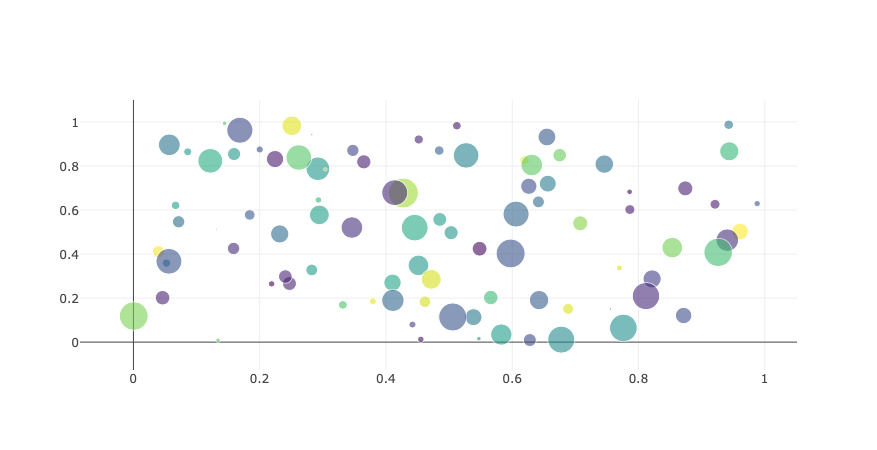

In [9]:
fig = go.Figure()

fig.add_scatter(x=x,
                y=y,
                mode='markers',
                hovertext=ids,
                marker={'size': sz,
                        'color': colors,
                        'opacity': 0.6,
                        'colorscale': 'Viridis'})

iplot(fig)

Layout of the plot

In [10]:
layout = go.Layout(title='SCATTER PLOT',
                   xaxis={'title':'x'},
                   yaxis={'title':'y'},
                   hovermode='closest')

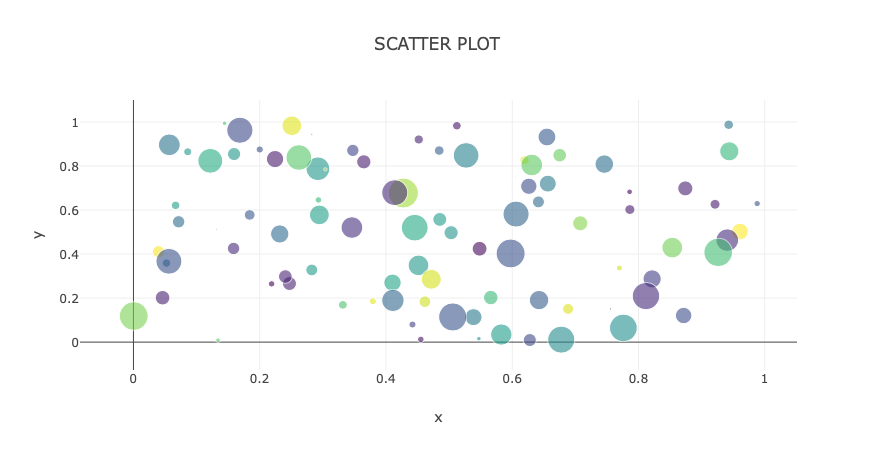

In [11]:
fig = go.Figure(layout=layout)

fig.add_scatter(x=x,
                y=y,
                mode='markers',
                hovertext=ids,
                marker={'size': sz,
                        'color': colors,
                        'opacity': 0.6,
                        'colorscale': 'Viridis'})
iplot(fig)

ref: https://plot.ly/python/static-image-export/

# Example: line plot ---Bessel functions

In [12]:
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [13]:
import numpy as np
from scipy import special  # calling bessel function jv

x = np.linspace(0, np.pi, 300)

In [14]:
layout = go.Layout(title='<b>BESSEL FUNCTION</b>',
                   yaxis={'title':'<i>bessel 1</i>'},
                   xaxis={'title':'<i>x</i>'})

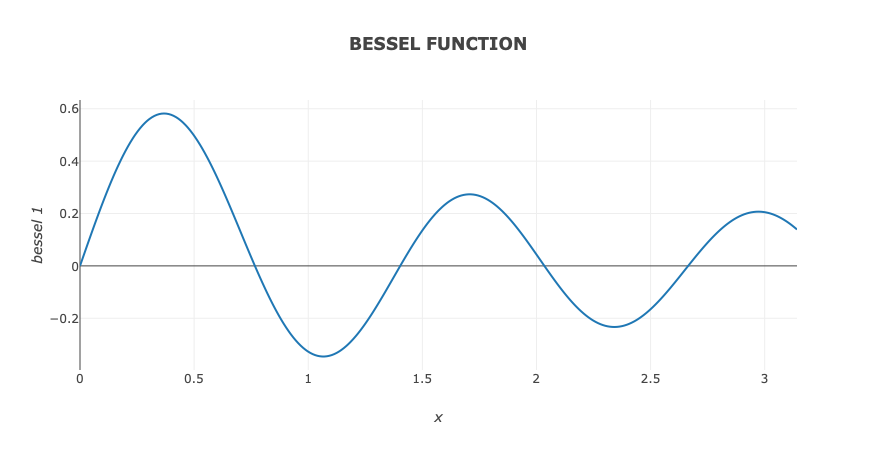

In [15]:
freq = 5

trace = go.Scatter(x=x,
                   y=special.jv(1, freq * x),
                   mode='lines',    # markers or both
                   line={'shape':'spline'})

fig = go.Figure(data=[trace], layout=layout)

iplot(fig)

# More channels?
- Different order of bessel functions?
- Different frequency?


# Widgets 

In [16]:
from ipywidgets import interactive
import ipywidgets as widgets

<br>
Select widget:

In [17]:
orders = widgets.SelectMultiple(options=list(range(6)), 
                                value=(0, ),    # default value
                                description='Bessel Order')
orders

SelectMultiple(description='Bessel Order', index=(0,), options=(0, 1, 2, 3, 4, 5), value=(0,))

<br>
Slider widget:

In [18]:
freq = widgets.FloatSlider(min=5, max=20, value=5, description='Freq')
freq

FloatSlider(value=5.0, description='Freq', max=20.0, min=5.0)

In [19]:
def update_plot(orders, freq):
    """
    This function updates the plot everytime a widget is changed
    """
    
    data = []
    
    for order in orders:
        trace = go.Scatter(x=x,
                           y=special.jv(order, freq * x),
                           mode='lines',
                           name='bessel {}'.format(order),
                           line={'shape':'spline'})
        data.append(trace)

    fig = go.Figure(data=data, layout=layout)
    
    iplot(fig)
    

widgets.interactive(update_plot, freq=freq, orders=orders)


interactive(children=(SelectMultiple(description='Bessel Order', index=(0,), options=(0, 1, 2, 3, 4, 5), value…

ref:
- tutorial video: https://www.youtube.com/watch?v=XUNaGFa9xCM
- github: https://github.com/markjay4k/fourier-transform/blob/master/plotly_bessel_example.ipynb

In [20]:
import plotly.graph_objs as go

import numpy as np

x = np.random.rand(100)
y = np.random.rand(100)

f = go.FigureWidget([go.Scatter(x=x, y=y, mode='markers')])

scatter = f.data[0]
colors = ['#a3a7e4'] * 100
scatter.marker.color = colors
scatter.marker.size = [10] * 100
f.layout.hovermode = 'closest'


# create our callback function
def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        c[i] = '#bae2be'
        s[i] = 20
        scatter.marker.color = c
        scatter.marker.size = s


scatter.on_click(update_point)

f

FigureWidget({
    'data': [{'marker': {'color': [#a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
               …